In [1]:
import numpy as np
import pandas as pd
from numpy import genfromtxt
import matplotlib.pyplot as plt

#### data

In [2]:
data=pd.read_csv('data.csv',index_col=0)

In [3]:
categorical=['driveway','recroom','fullbase','gashw','airco','prefarea']
#converting categorical data to numerical values
for col in categorical:
    
    temp=data.loc[:,col]
    c=temp.nunique()
    temp=temp.astype('category')
    temp.cat.categories=np.arange(c)
    
    data.loc[:,col]=temp

##### normalization

In [4]:
pmax=data.loc[:,'price'].max()
pmin=data.loc[:,'price'].min()
data.loc[:,'price']=data.loc[:,'price'].apply(lambda x:(x-pmin)/(pmax-pmin))

In [5]:
lmax=data.loc[:,'lotsize'].max()
lmin=data.loc[:,'lotsize'].min()
data.loc[:,'lotsize']=data.loc[:,'lotsize'].apply(lambda x:(x-lmin)/(lmax-lmin))

In [6]:
data.insert(1,"x0",np.ones(len(data)))

In [7]:
data.head(1)

,price,x0,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
1,0.10303,1.0,0.28866,3,1,2,1,0,1,0,0,1,0


In [130]:
d=data.values
xd,yd=d[:,1:],d[:,:1]
m=len(d)
n=xd.shape[1]
tau=10
lr=0.01
xd.shape,yd.shape

((546, 12), (546, 1))

#### locally weighted regression

In [150]:
def initialize_weights():
    thetas=np.random.randn(n,1)
    return thetas

def calculateWeight(p):
    weights=[]
    for n in xd:
        sum=0
        for i in range(len(p)):
            sqr=(p[i]-n[i])*(p[i]-n[i])
            sum += np.exp(-sqr/2*(tau**2))
        weights.append(sum/len(p))
    return np.reshape(np.array(weights),newshape=(-1,1))

def forward(x,w):
    return np.dot(x,w)

def diff(y,y_):
    out=(y_- y)
    return out

def gradient(dw,x,weights):
    return (dw*x*weights).mean()

def mse(y,y_):
    return np.mean(np.multiply(y-y_ , y-y_))

def denorm(y):
    return (y*(pmax-pmin))+pmin

In [153]:
earr=[]#epcoch array
larr=[]#loss array
def train(index):
    localpoint=xd[index]
    thetas=initialize_weights()
    weights=calculateWeight(localpoint)
    weights[index]=0#don't consider localpoint for training
    for epoch in range(100):
        ypred=forward(xd,thetas)
        dw=diff(yd,ypred)

        earr.append(epoch)
        larr.append(mse(yd,ypred))
        for i in range(len(thetas)):
            grad=gradient(dw,xd[:,i:i+1],weights)
            thetas[i]=thetas[i] - learning_rate*grad
    
    return forward(localpoint.reshape(-1,12),thetas),yd[index]
pred,test=train(100)

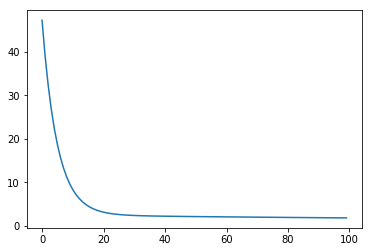

In [154]:
plt.plot(earr,larr)